In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
X = pd.read_csv('logisticX.csv', header=None)
y = pd.read_csv('logisticY.csv', header=None)

# Normalize the independent variables
X = (X - X.mean()) / X.std()

# Add intercept term
X.insert(0, 'intercept', 1)

# Convert y to 1D array
y = y.values.flatten()

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    J = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return J

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

# Train the model with learning rate 0.1
alpha = 0.1
iterations = 100
theta = np.zeros(X.shape[1])
theta_final, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Print cost function value and learning parameter value after convergence
print("Cost function value:", cost_history[-1])
print("Learning parameter values after convergence:", theta_final)


Cost function value: 0.2848142867717061
Learning parameter values after convergence: [ 0.03792801  1.24492374 -1.25764023]


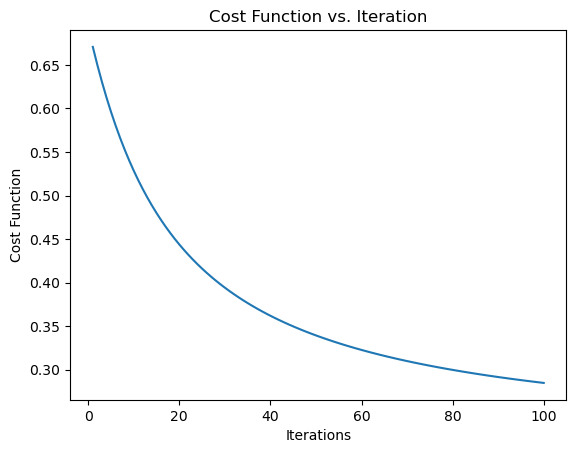

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [5]:
# Plot cost function vs. iteration graph
plt.plot(range(1, iterations + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.show()

# Plot the decision boundary and dataset
plt.figure(figsize=(8, 6))



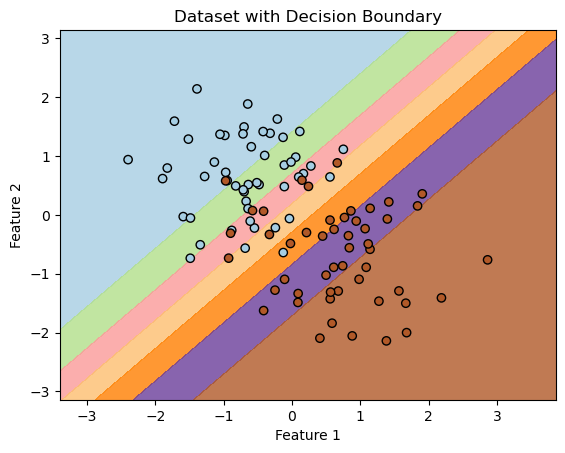

In [7]:
# Define a meshgrid of x and y values
x_min, x_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
y_min, y_max = X.iloc[:, 2].min() - 1, X.iloc[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the meshgrid
Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], theta_final))
Z = np.array(Z).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

# Plot dataset
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.show()



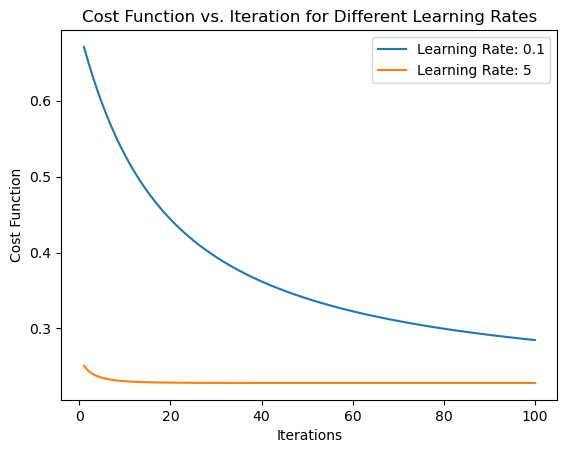

In [9]:
# Train the model with learning rate 5
alpha = 5
theta = np.zeros(X.shape[1])
theta_final_5, cost_history_5 = gradient_descent(X, y, theta, alpha, iterations)

# Plot cost function vs. iteration curve for both learning rates
plt.plot(range(1, iterations + 1), cost_history, label='Learning Rate: 0.1')
plt.plot(range(1, iterations + 1), cost_history_5, label='Learning Rate: 5')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration for Different Learning Rates')
plt.legend()
plt.show()

In [10]:
# Function to predict class labels
def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return [1 if x >= 0.5 else 0 for x in probabilities]

# Function to calculate confusion matrix
def confusion_matrix(actual, predicted):
    true_positive = np.sum((actual == 1) & (predicted == 1))
    false_positive = np.sum((actual == 0) & (predicted == 1))
    false_negative = np.sum((actual == 1) & (predicted == 0))
    true_negative = np.sum((actual == 0) & (predicted == 0))
    return np.array([[true_positive, false_positive], [false_negative, true_negative]])
# Function to calculate accuracy, precision, recall, and F1-score
def performance_metrics(conf_matrix):
    true_positive, false_positive, false_negative, true_negative = conf_matrix.flatten()

    # Check for division by zero
    if true_positive + true_negative == 0:
        accuracy = precision = recall = f1_score = 0.0
    else:
        accuracy = (true_positive + true_negative) / np.sum(conf_matrix)

        # Check for division by zero in precision and recall
        if true_positive == 0 or (true_positive + false_positive) == 0:
            precision = recall = f1_score = 0.0
        else:
            precision = true_positive / (true_positive + false_positive)
            recall = true_positive / (true_positive + false_negative)
            f1_score = 2 * (precision * recall) / (precision + recall)

    return accuracy, precision, recall, f1_score

# Calculate confusion matrix for the training dataset
predictions = predict(X, theta_final)
conf_matrix = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate performance metrics
accuracy, precision, recall, f1_score = performance_metrics(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Confusion Matrix:
[[0 0]
 [0 0]]
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
